In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.6.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# compile ther model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.9135 - val_loss: 0.1459 - val_accuracy: 0.9551
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1428 - accuracy: 0.9575 - val_loss: 0.1003 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9676 - val_loss: 0.0858 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9736 - val_loss: 0.0797 - val_accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0737 - accuracy: 0.9767 - val_loss: 0.0734 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9793 - val_loss: 0.0686 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0735 - val_accuracy:

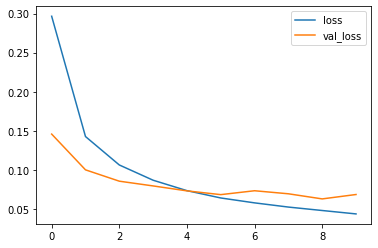

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

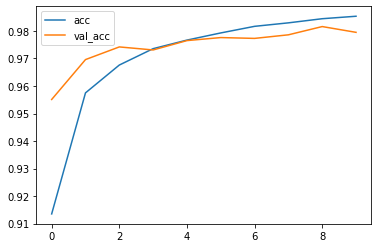

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9795
[0.06873384118080139, 0.9794999957084656]


Confusion matrix, without normalization
[[ 969    0    1    1    1    1    3    1    2    1]
 [   0 1127    2    2    0    1    1    1    1    0]
 [   2    0 1011    6    1    0    2    5    5    0]
 [   0    0    3  997    0    5    0    3    1    1]
 [   1    0    2    0  952    1    5    2    2   17]
 [   1    0    0   10    1  874    3    0    2    1]
 [   3    3    1    1    2    6  940    0    2    0]
 [   1    4    9    7    3    0    0  996    1    7]
 [   4    0    1    5    3    5    2    4  948    2]
 [   0    3    0    7    9    4    0    5    0  981]]


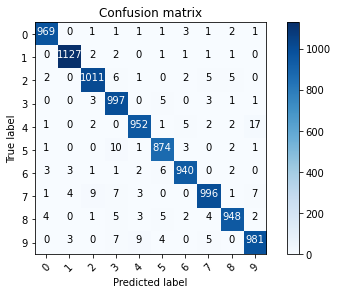

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

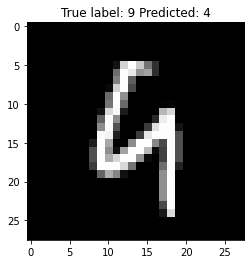

In [11]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));